In [1]:
#load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob 
import os

%matplotlib inline

## Data Set Introduction
The data set contains roughly 1850000 bike trips from January 2018 to December 2018. The variables of interest for this analysis were trip duration, gender and user type (customer versus subscriber).

In [2]:
#load dataset
df = pd.read_csv('fordgobike-tripdata.csv')

## Trips taken by customer type and gender
The data shows that the those that use the product the most are subscribers as opposed to customers. It can be clearly seen that male subscribers are the highest user of the product, followed by women. A similar, but much smaller distribution can be seen for customer's. More male customer's tend to use the product as opposed to women.

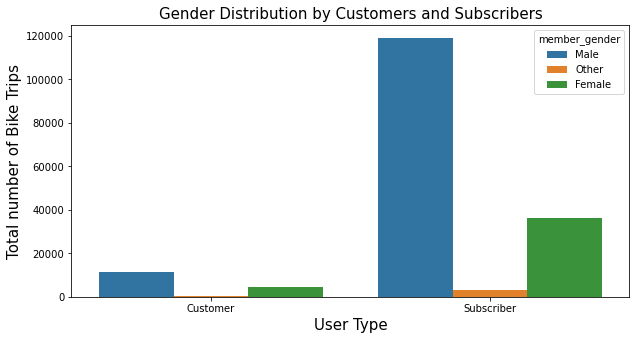

In [3]:
#first plot
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[1]
g = sns.countplot(data=df, x='user_type',hue='member_gender')
plt.title('Gender Distribution by Customers and Subscribers',fontsize=15)
g.set_xlabel('User Type', fontsize=15)
g.set_ylabel('Total number of Bike Trips', fontsize=15);

## Duration of Trips by User Type
An intersting finding was that customers tend to be on take longer trips than subscribers. Customers go on trips of up to 40 minutes, whereas subscribers's longest trips are up to 25 minutes. 

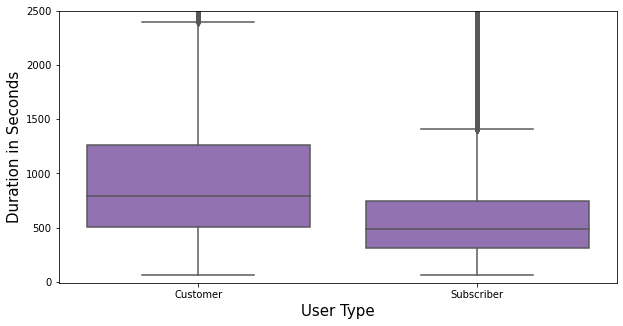

In [4]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[4]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type', fontsize = 15)
plt.ylabel('Duration in Seconds', fontsize = 15)
plt.show()

## A complementary visualisation to duration of use by user type

Again, the graph shows that customer's tend to use the product for longer durations than subscribers.

In [5]:
#feature engineer weekday
df.start_time = pd.to_datetime(df.start_time)
df['weekday'] = df['start_time'].dt.dayofweek

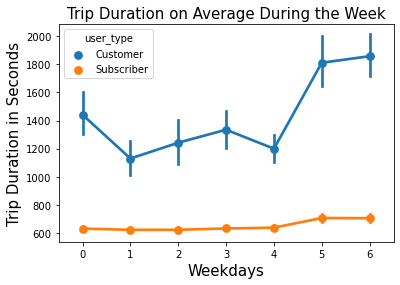

In [6]:
mv2 = sns.pointplot(data=df, x='weekday' , y='duration_sec', hue='user_type')
plt.xlabel('Weekdays',fontsize=15)
plt.ylabel('Trip Duration in Seconds', fontsize=15)
plt.title('Trip Duration on Average During the Week',fontsize=15);

## Duration of Trips over the course of a week
Customers tend to frequently use the product on Thursdays. It pretty much peaks on Thursdays. Subscribers on the other hand, tend to continously use the product with peaks on Tuesdays and Thursdays. The duration time of the usage is higher for customer's than for subscriber's, which is in line with the above finding. 

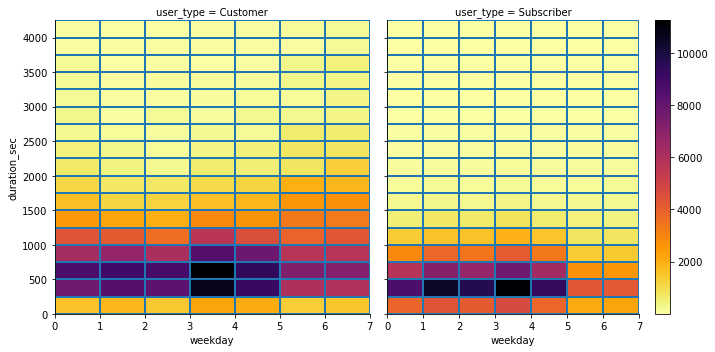

In [7]:
#plotting
xbin = np.arange(0,7+1,1)
ybin = np.arange(0,4200+250,250)

mv3 = sns.FacetGrid (data = df , col='user_type', height=5)
mv3.map(plt.hist2d, 'weekday', 'duration_sec', cmin=0.5, cmap = 'inferno_r', bins=[xbin,ybin])
plt.colorbar();

## Summary
Male subscriber tend to use the product the most, followed by women. Overall, customer's use the product for longer trips, whereas subscribers use the product continsouly throughout the week. 